# Automobile Price Estimation

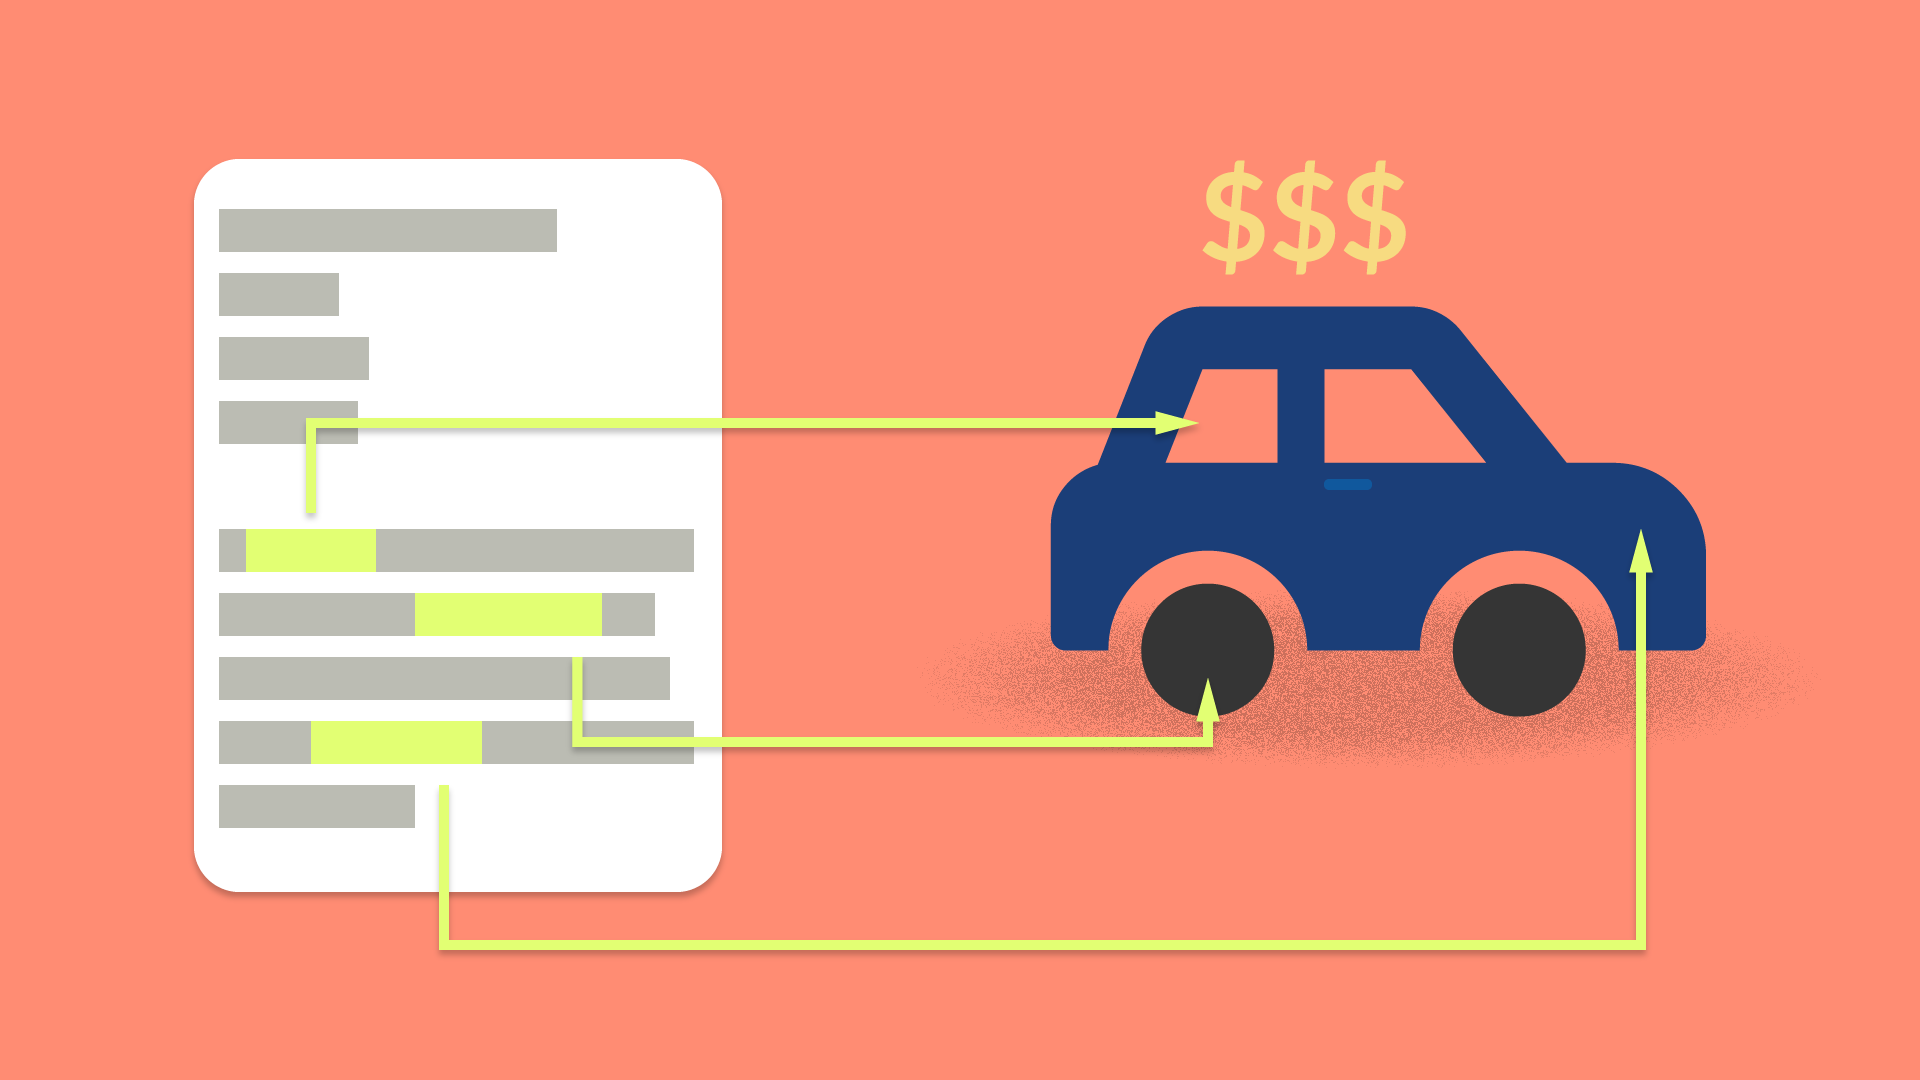

# Data Science Project Lifecycle

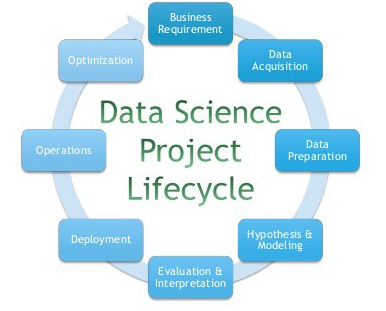

Lets try to understand the stages in the data science project lifecycle with this example data set. We will focus on the following four stages namely - <b>
- Business Understanding
- Data Acquisition
- Data Preparation
- Modeling

# 1. Business Understanding
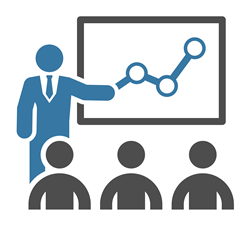

In the 80's, the automobile dataset was crafted to estimate the price of car taking into consideration the charactristics of the several car instances. <br>

This data set consists of three types of entities: 
(a) the specification of an auto in terms of various characteristics, <br>
(b) its assigned insurance risk rating, <br>
(c) its normalized losses in use as compared to other cars<br>

The second rating corresponds to the degree to which the auto is more risky than its price indicates.
Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. <br>

The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons,
sports/speciality, etc...), and represents the average loss per car per year.

# 2. Data Acquisition 
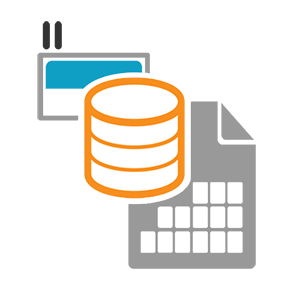

Data Source : https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

In [1]:
# import pandas library which will help us in the data preparation as well as in data exploration
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Lets check the number of records in this dataset.

In [2]:
len(df)

NameError: name 'df' is not defined

205 records are present. Now lets get more information about the attributes present in the dataset. 

In [ ]:
df.shape

It means there are 205 records with 26 attributes.

Lets now see the first and last few records of the dataset. 

In [ ]:
df.head()

In [ ]:
df.tail()

More detailed information about the dataset and its usage can be obtained from the source mentioned at above UCI dataset link. Refer file "imports-85.names" for the metadata information and "imports-85.data.txt" for the actual data records.

# 3. Data Preparation / Preprocessing
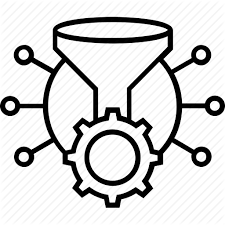

The objective of this step are - <b>
- To improve data quality
- To modify data to better fit specific data mining technique

The major steps involved are  <br><br>
<br> 1) Data cleaning<br>
- Fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies<br>

<br> 2) Data integration
- Integration of multiple databases, data cubes, or files<br>

<br> 3) Data reduction
- Dimensionality reduction
- Numerosity reduction
- Data compression<br>

<br> 4) Data transformation
- Data discretization
- Normalization 
- Concept hierarchy generation

Predicted price of car is based on all the numeric and Boolean attributes. The dataset is not usable directly for the prediction task as some categorical attributes are present in it. Hence requires some modifications. Also some of the features needs to transformed into other formats so that they can be used for the prediction purposes. During this exercise, we are going to see what inital data preprocessing and feature engineering steps can be applied on this dataset to make it usable for the numeric prediction. 

In [ ]:
df.head()

<b> 3.1 Attribute Labelling <b>

Oh! The dataset does not have the attribute names! Just some numbers and strings are appearing. Needs to fix this. As we have read the metadata file associated with this dataset, we can attach the following labels to the attributes.

In [ ]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
headers

In [ ]:
#Attach the headers with the dataframe columns
df.columns = headers
df.head(5)

In [ ]:
#Lets quickly check the column names 
df.columns

<b> 3.2 Quick Null value checks <b>

Lets do a quick check on the missing values of "price" attribute. 

In [ ]:
#pandas gives a simple way to remove the missing values
df.dropna(subset=["price"], axis=0)

#axis
#0, or ‘index’ : Drop rows which contain missing values.
#1, or ‘columns’ : Drop columns which contain missing value.

df.head(5)
df.shape

In [ ]:
# check the data type of data frame "df" by .dtypes
df.dtypes

<b> 3.3 Quick Summary Stat <b>

Python provides a quick way to look at the five number summary of the attributes namely min, Q1, median, Q3 and max. 

In [ ]:
df.describe()

What if I want to have a look at stat information for all columns?

In [ ]:
# describe all the columns in "df" 
df.describe(include = "all")

In [ ]:
df.head(10)

Some of the attributes contains "?" in it and no body known the reason for it. May its missing values and replaced by "?" into the source system. So lets replace it by "NaN". 

<b> 3.5 Missing Values imputation (Data Cleansing)<b>

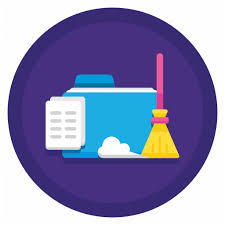

Lets see how the missing values can be replaced in the dataset. First check whereall the missing values are present. 

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

Take a closer look at the actual missing value count. 'False' means cell has a value whereas 'True" means cell is missing value. Output the count for different attributes of dataframe.

In [3]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

NameError: name 'missing_data' is not defined

Interesting! Many of the columns are having the missing values in it. Lets go and figure out different ways by which it can be replaced.

<b> 3.5.1 Replace by average<b>

For numeric variable, simplest of imputing the missing value by average can be applied. 

In [ ]:
#Find out the average for "normalized-losses"
avg_normalized_losses = df["normalized-losses"].astype("float").mean(axis = 0)
print("avg_normalized-losses : ", avg_normalized_losses)

#Use the average "normalized-losses" for the inplace replacement
df["normalized-losses"].replace(np.nan, avg_normalized_losses, inplace = True)

Lets repeat for other numeric attributes like 'bore', 'stroke', 'horsepower', 'peak-rpm'.

In [ ]:
avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace= True)

In [ ]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace= True)

In [ ]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace= True)

In [ ]:
avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace= True)

<b> 3.5.2 Replace by mode <b>

But for categorical values, replacement by average is not possible! Then can we think of finding out the mode from the data values and use it for missing value replacement. Apply it on 'num-of-doors' attribute.

In [4]:
df['num-of-doors'].value_counts()

NameError: name 'df' is not defined

In [ ]:
df['num-of-doors'].value_counts().idxmax()

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

<b> 3.5.3 Dropping the records<b>

If the "price" attribute value is missing then it seems the record is not that useful as the target itself. So it make sense to drop the the rows having the missing values.

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

<b> 3.6 Data transformation <b>

This step can consider various transformation techniques like 
- Datatype conversion
- Dervied fields creation
- Normalization

Still the dataset is not in a format so that it can be used for the prediciton purpose. Some more transformation needs to be carried out on some attributes of dataset.

<b> 3.6.1 Datatype conversion <b>

Lets explore the non numerics columns!

In [ ]:
df.dtypes

Hmm! There are still many. Lets try to convert them to numbers.

In [5]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

NameError: name 'df' is not defined

Lets recheck the datatypes now!

In [ ]:
df.dtypes

<b> 3.6.2 Creating Dervied attributes<b>

Lets convert the "city miles per gallon" to liter based average.

In [ ]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

<b> 3.6.3 Modifying existing attributes<b>

Lets apply the same conversion on the highway attribute as well.

In [ ]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

Lets convert the length, width and height into fractions using the max values.

In [ ]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

<b> 3.6.4 Data Discretization / Binning<b>

Each and every value of "horsepower" attribute will not be that helpful but if we are able to group it then some meaningful insights can be dervied out it. Lets try out that binning.

In [ ]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

Lets attach some categorical labels to the bins created above!

In [ ]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(5)

Lets visualize this relationship.

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<b> 3.6.5 Dummy Variable Creation<b>

The categorical variables can be converted into dummy variables each one representing whether the discrete value is present or absent for that record. Lets try it on "fuel-type" attribute.

In [6]:
df["fuel-type"].unique()

NameError: name 'df' is not defined

This attribute has two discerete values gas and diesel. Dummary variable will create two attributes out of it. One related to gas value other related to diesel value.

In [ ]:
dummy_variable_fuel_type = pd.get_dummies(df["fuel-type"])
dummy_variable_fuel_type.head()

In [ ]:
dummy_variable_fuel_type.rename(columns={'fuel-type-gas':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_fuel_type.head()

Lets merge the dummy variables into the original dataframe.

In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_fuel_type], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df.head()

Lets do the same for "aspiration" variable.

In [ ]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_aspiration = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_aspiration.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_aspiration"
dummy_variable_aspiration.head()

In [ ]:
#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_aspiration], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

Lets export the dataset to the CSV file. The exported dataset will be stored in the same directory where this notebook is present.

In [ ]:
df.to_csv('clean_df.csv')

# 4. Hypothesis and Model Buidling
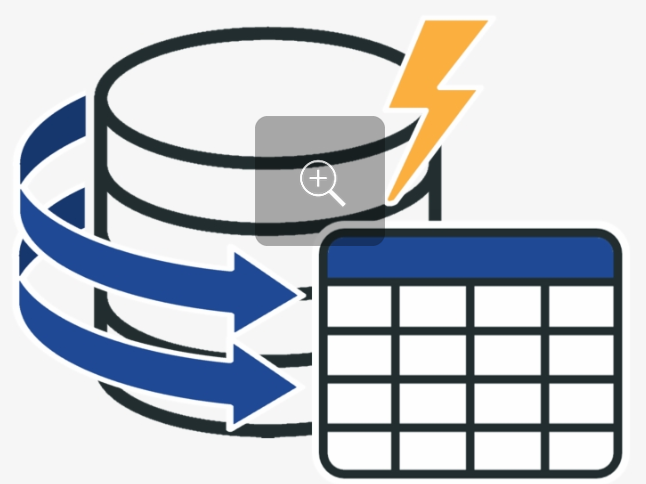

Lets try to find out the attributes those are contributing to the prediction of the car price. We can use Exploratory Data Analysis which also makes effective use of the data visualizations to represent the relationsip between the variables. Using this representations the modeler can make a guided decision to identify the variable which can be dropped.

<b> 4.1 Univariate Analysis <b>

Lets try to visualize the five number summary for few of the attributes which can play significant role in determining the price of the car. 

In [ ]:
#body-style
sns.boxplot(x="body-style", y="price", data=df)

In [ ]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<b> 4.2 Correlation Analysis <b>

Lets first see the relationsip with numbers!

Too hard to interpret that relationship. Lets see how visuzalitions can help in here.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

First try out to see the relationship between predictor variable "engine-size" with respect to the target variable "price".

In [8]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

NameError: name 'df' is not defined

There seems to be positive relationship between them. Lets confirm using the correlation coefficient.

In [ ]:
df[["engine-size", "price"]].corr()

Lets visualize the relationship between "highway-mpg" and "price".

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [ ]:
df[['highway-mpg', 'price']].corr()

Depciting out a strong relationship between these two variables. 

Lets apply it for "peak-rpm" and "price".

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [ ]:
df[['peak-rpm','price']].corr()

There seems to be negative relationship between these two variables.

<b> 4.3 Grouping <b>

Lets see how price behaves when more than one attributes are taken into consideration. Consider "drive-wheels","body-style" for this exercise.

In [ ]:
df['drive-wheels'].unique()

In [ ]:
df['body-style'].unique()

Lets do some grouping based on these two attributes.

In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]

In [ ]:
# grouping results by "drive-wheels"
df_group_1 = df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_1

In [ ]:
# grouping results by "body-style"
df_group_2 = df_group_one.groupby(['body-style'],as_index= False).mean()
df_group_2

In [ ]:
# grouping results by "drive-wheels" and "body-style"
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

Lets see it as a pivot!

In [ ]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

On seems some possibilities does not exists! Lets replace it by zero.

In [ ]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

<b> 4.4 Model Building and Prediction<b>

Seems 'highway-mpg' and few other attributes are important while doing the price prediction. So lets try to fit a linear regression model using them.

In [ ]:
# path of data 
path = "clean_df.csv"
df = pd.read_csv(path)
df.head()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

Lets set 'highway-mpg' as predictor and 'price' as target. 

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
lm.fit(X,Y)

Lets try to do a prediction using the same! Give the the price if highway mileage for first five records.

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]   

Lets look at the model parameters. What are the coefficients for this model?

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

How the model expression looks like then?

price = -14617.843054664594   + 3458.68511314 * 'highway-mpg'

Lets try it out with few more predictors!

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
 lm.fit(Z, df['price'])

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

How the model expression looks like then?

price = -14386.530839268136 + 36.60 * 'horsepower'+ 3.50 * 'curb-weight' + 85.38 * 'engine-size' +  500.93 * 'highway-mpg'

Lets do some prediction with some car records! <br>
Record1 = (  'horsepower' = 1,  'curb-weight' = 1.1,  'engine-size' = 2, 'highway-mpg' = 34)<br>
Record2 = (  'horsepower' = 2,  'curb-weight' = 1.1,  'engine-size' = 2, 'highway-mpg' = 34)

In [ ]:
Yhat=lm.predict([[1, 1.1, 2, 34], [2, 1.1, 2, 34]])
print(Yhat[0])
print(Yhat[1])